<!-- -*- coding: utf-8 -*- -->
Universita digli di GENOVA                               
   Graph Analytics
2019-2020 


<h1 style="color:#990000;text-align: center"> Part 1 : ANALYSE LINUX GRAPH </h1>
    <h4 style="color:#00b00;text-align: center"> Souad BOUTANE</h4> 
   

--------------------------------------------------------

<h2 style="color:#990000">I. INTRODUCTION </h2>

The aim of this part is to analyse a realistic network, by building the graph and computing all the metrics discussed in class, using the following technologies and materials:

    >Python    : programming language
    >NetwokX   : python library to manipulate graphs
    >Gephi     : visualisation tool of large graph

The domain of realistic dataset is Software.
We will start by introducing the dataset and build its network.

<h2 style="color:#990000">II. DATASET </h2> 

Linux dataset is dated on 2014, on the basis of Linux version 3.16. It provide an **acyclic** network of Linux source code files, with **directed** edges denoting that they include each other. 

    >Node : File
    >Edge : Inclusion

The dataset is presented using **Edge List** of the network in space separated values format, with one edge per line.
The meaning of the columns in out.csv are: 

    >First column : ID of from node (File)
    >Second column: ID of to node (File)


<h4 style="color:#2E8B57">a. Load Dataset </h4>

Using Networkx, we can load the data and create the graph with only one line of code:


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#load the data
G=nx.read_edgelist('data/out.csv','%', nodetype=int,delimiter=";", create_using=nx.DiGraph())

<h4 style="color:#2E8B57">b. Plot Dataset </h4>

We tried at first to draw the graph using the function networkX() and matplotlib, but it took many time without any results.

`nx.draw(G)`
`plt.show()`

therefor we decided to try the suggested tool GEPHI. we applied two layers on the graph, openOrd and Force Atlas 2, and as results we get:

<h5>Force Atlas 2 Layer</h5>
<img src="img/ForceAtlas.png" alt="Linux graph"  width="50%" height="50%">
<h5>OpenOrd Layer</h5>
<img src="img/OpenOrd.png" alt="Linux graph"  width="50%" height="50%">



<h2 style="color:#990000">II. ANALYTICS </h2> 

- To analyse the graph, we will compute in each step some metrics and interpret them, most of the metric will be computed twice one for in links and other for out links. 


<h4 style="color:#2E8B57">1. Number of edges and node </h4>

In [2]:
N=G.number_of_nodes()
L=G.number_of_edges()

print('Number of nodes    :',N)
print('Number of  links   :',L)

Number of nodes    : 30837
Number of  links   : 213954


<span style="color:#20B2AA">=> Number of links is equal to the total number of in links and also  the total out links</span>

<h4 style="color:#2E8B57">2. Average Degree </h4>

- Then we compute the average degree for both indegree and outdegree:

In [3]:
#-------Degree Analysis

def Average_degree(G,type="in"):
    it=G.in_degree if type=="in" else G.out_degree
    sum=0
    for x in it:
        sum+=x[1]
    return sum/N

avg_degree_in=Average_degree(G,"in")
avg_degree_out=Average_degree(G,"out")

print('Average degree IN:',avg_degree_in)
print('Average degree OUT:',avg_degree_out)

Average degree IN: 6.938223562603366
Average degree OUT: 6.938223562603366


<span style="color:#20B2AA">=> As we see in class, the average outdegree is equal to the average indegree for directed graph.</span>

- Now let's plot the degree distribution :

<class 'numpy.ndarray'>


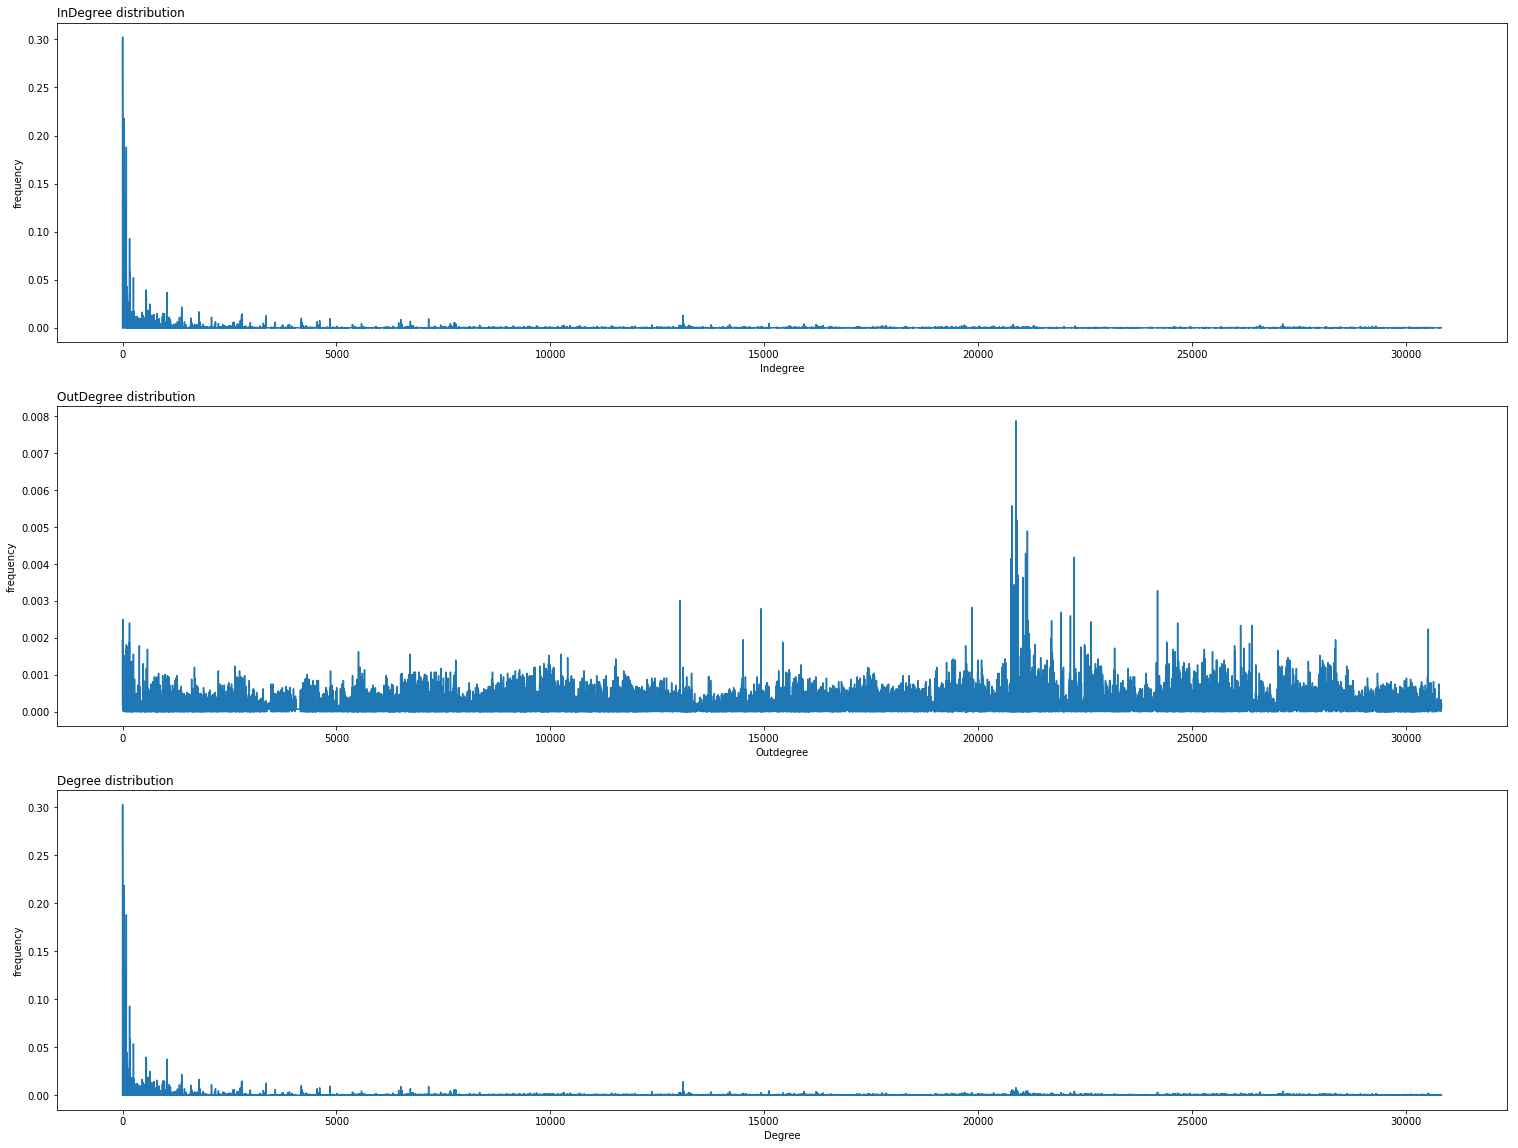

In [4]:
#Plot degree distribution

def plot_degree_dist(G):
    
    #compute In and Out degree
    degrees_in  = [G.in_degree(n)/N  for n in G.nodes()]
    degrees_out = [G.out_degree(n)/N for n in G.nodes()]
    degrees     = [G.degree(n)/N     for n in G.nodes()]
    
    fig, ax = plt.subplots(3,1,figsize=(26,20))
    
    #plot distribution
    #ax1=plt.hist(in_degrees)
    ax[0].plot(degrees_in )
    ax[1].plot(degrees_out)
    ax[2].plot(degrees    )
    
    
    print(type(ax))
    #set titles
    ax[0].set_title("InDegree distribution",loc='left')
    ax[1].set_title("OutDegree distribution",loc='left')
    ax[2].set_title("Degree distribution",loc='left')
    
    #axis name
    ax[0].set_xlabel('Indegree') ;  ax[1].set_xlabel('Outdegree') ; ax[2].set_xlabel('Degree') 
    ax[0].set_ylabel('frequency');  ax[1].set_ylabel('frequency') ; ax[2].set_ylabel('frequency')
    
    plt.show()
    
    
plot_degree_dist(G)

<ul style="color:#20B2AA">We can see that:
      <li>  Total degree distribution has a power law shape</li>
      <li>  Indegree distribution has power low shape      </li>
      <li>  Outdegree distribution has a Gaussian shape    </li>
</ul>

<div style="color:#20B2AA">
=> Directed networks have two different degree distributions, the in-degree and the out-degree distributions. Typically, the in-degree distribution is the important one.
</div>

<h4 style="color:#2E8B57">3. Density </h4>

- Our graph is directed witout loop, so `density=(avg degree)/(number of node-1)`

In [5]:
D=avg_degree_in/(N-1)
print("Density  : ",D)

Density  :  0.00022500400708922577


<span style="color:#20B2AA">=> Density is close to 0, so our graph is <strong>Sparse Network .</strong> </span>

<h4 style="color:#2E8B57">4. Connexion </h4>

- Before strating computing the shotest path and diameter, we should first check is if the graph is strongly connected or weakly connected:


In [6]:
strg=nx.is_strongly_connected(G)
weak=nx.is_weakly_connected(G)

print("The graph is strongly connected" if strg else "The graph is not strongly connected")
print("The graph is weakly connected" if weak else "The graph is not weakly connected")


The graph is not strongly connected
The graph is not weakly connected


- The graph is not connected, which mean there is isolated node or components, let check the number of SCC and also WCC our graph:

In [7]:
SCC_n=nx.number_strongly_connected_components(G)
WCC_n=nx.number_weakly_connected_components(G)

print("number of SCC :",SCC_n)
print("number of WCC :",WCC_n)

number of SCC : 29830
number of WCC : 12


<span style="color:#20B2AA"> => To SCC will be used to compute the diametre of ghraph, and WCC will be used to compute the Average of Shortest path </span>

<h4 style="color:#2E8B57">5. Diameter </h4>

- To compute diameter, we should iterate on SCC and compute the shortest path of each node,the diameter is the longest geodesic path.

In [8]:
SCC_set=nx.strongly_connected_component_subgraphs(G, copy=True)
diameter=max(nx.diameter(i) for i in SCC_set)

print("diameter :",diameter)

diameter : 19


<h4 style="color:#2E8B57">6. Average of Shortest path </h4>

In [9]:
WCC_set=nx.weakly_connected_component_subgraphs(G, copy=True)
avg_giodesic=0
for i in WCC_set:
    avg_giodesic+=nx.average_shortest_path_length(i)
    
print("The average of shortest/giodesic path :",avg_giodesic)

The average of shortest/giodesic path : 4.030498462079988


<h4 style="color:#2E8B57">7. Global clustring </h4>

In [10]:
#T_n =nx.triangles(G)
GC  =nx.transitivity(G)
LC  =nx.average_clustering(G)


#print("Number of triangle in all the graph:",T_n)
print("The global clustering coefficient:",GC)
print("The average of local clustering coefficient:",GC)

The global clustering coefficient: 0.056917071701333866
The average of local clustering coefficient: 0.056917071701333866


<span style="color:#20B2AA"> => It means that 5% of triad are clique </span>

<span style="color:#20B2AA"> => and 5.6% of neighbours know each other</span>

<h4 style="color:#2E8B57">8. Degree Assortative coefficient </h4>

In [11]:
degree_assortative_coef=nx.degree_assortativity_coefficient(G)

print("Degree assortative coefficient :",degree_assortative_coef)

Degree assortative coefficient : -0.07729078923402623


<span style="color:#20B2AA"> => Our network is desassortative </span>

<h4 style="color:#2E8B57">9. Giant Components </h4>

- In this step we will discover both the giant SCC and the giant WCC:

In [12]:
WCC_set=nx.weakly_connected_component_subgraphs(G, copy=True)
SCC_set=nx.strongly_connected_component_subgraphs(G, copy=True)

max_scc=0
max_wcc=0

for c in WCC_set:
    if c.number_of_nodes()>max_scc:
        giant_WCC=c
        max_scc=c.number_of_nodes()
        
for c in SCC_set:
    if c.number_of_nodes()>max_wcc:
        giant_SCC=c
        max_wcc=c.number_of_nodes()


print("The number of nodes of Giant SCC :",giant_SCC.number_of_nodes())
print("The number of nodes of Giant WCC :",giant_WCC.number_of_nodes())

The number of nodes of Giant SCC : 913
The number of nodes of Giant WCC : 30817


- save SCC components and the giant one , WCC components and giant one, then plot them using Gephi:

In [13]:
WCC=nx.Graph()
WCC=(nx.compose(WCC,H) for H in WCC_set)
SCC=nx.Graph()
SCC=(nx.compose(SCC,H) for H in SCC_set)


nx.write_edgelist(giant_SCC, "data/giant_scc.csv")
nx.write_edgelist(giant_WCC, "data/giant_wcc.csv")
nx.write_edgelist(giant_SCC, "data/scc.csv")
nx.write_edgelist(giant_WCC, "data/wcc.csv")

<h5>Giant WCC</h5>
<img src="img/giant_wcc.png" alt="Linux graph"  width="50%" height="50%">

<h5>Giant SCC</h5>
<img src="img/giant_scc.png" alt="Linux graph"  width="50%" height="50%">

<h4 style="color:#2E8B57">10. Closeness, betweeness and local clustering </h4>

- For each node in the gaph we will compute these three metrics, then sort then and display only the 10 top elements:

In [14]:
#compute metrics

closeness=nx.closeness_centrality(G)
betweeness=nx.betweenness_centrality(G)
l_clusterng=nx.clustering(G)  
out_degree=np.array(G.out_degree)
in_degree=np.array(G.in_degree)
pageRank=nx.pagerank(G, alpha=0.9)

In [15]:
#Sort metrics

Top_closeness=sorted(closeness.items(),key=lambda n: n[1], reverse=True)
Top_betweeness=sorted(betweeness.items(),key=lambda n: n[1], reverse=True)
Top_lClusterng=sorted(l_clusterng.items(),key=lambda n: n[1], reverse=True)
Top_outDegree=sorted(out_degree,key=lambda n: n[1], reverse=True)
Top_inDegree=sorted(in_degree,key=lambda n: n[1], reverse=True)
Top_pageRank=sorted(pageRank.items(),key=lambda n: n[1], reverse=True)

In [21]:
a=np.array([Top_inDegree,Top_pageRank,Top_closeness,Top_betweeness,Top_lClusterng])
x=np.array([a[0,:,0],a[0,:,1],a[1,:,0],a[1,:,1],a[2,:,0],a[2,:,1],a[3,:,0],a[3,:,1],a[4,:,0],a[4,:,1]])


- Start by analyse the In degree and out degree of graphs node

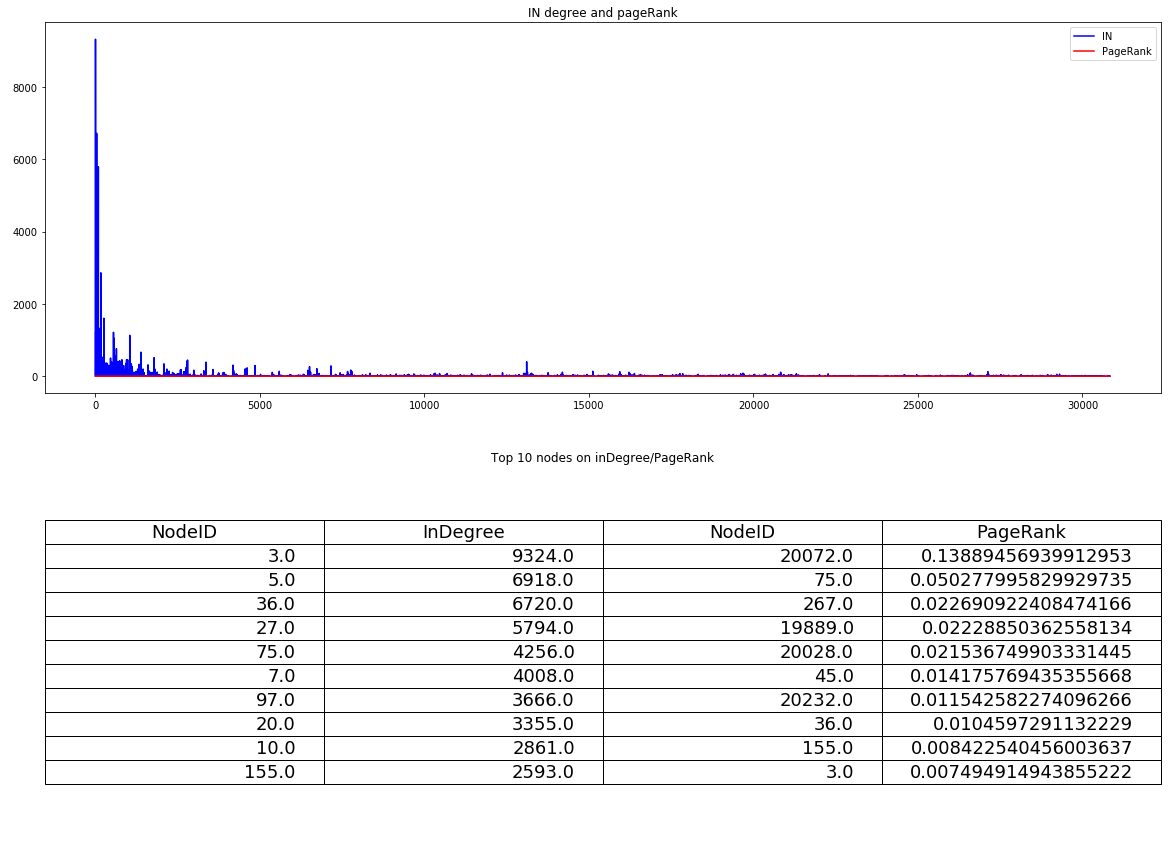

In [24]:
#Display IN OUT degree 

fig, axs =plt.subplots(2,1,figsize=(20,15))
axs[1].axis('tight')
axs[1].axis('off')

tab=axs[1].table(cellText=x[:4,:10].transpose(),colLabels=("NodeID","InDegree","NodeID","PageRank"),loc='center')
tab.set_fontsize(20)
tab.scale(1,2)
axs[1].set_title("Top 10 nodes on inDegree/PageRank")

axs[0].plot(in_degree[:,1].transpose(),color="blue" )
axs[0].plot(list(pageRank.values()),color="red" )
axs[0].legend(('IN','PageRank'))
axs[0].set_title("IN degree and pageRank")
plt.show()

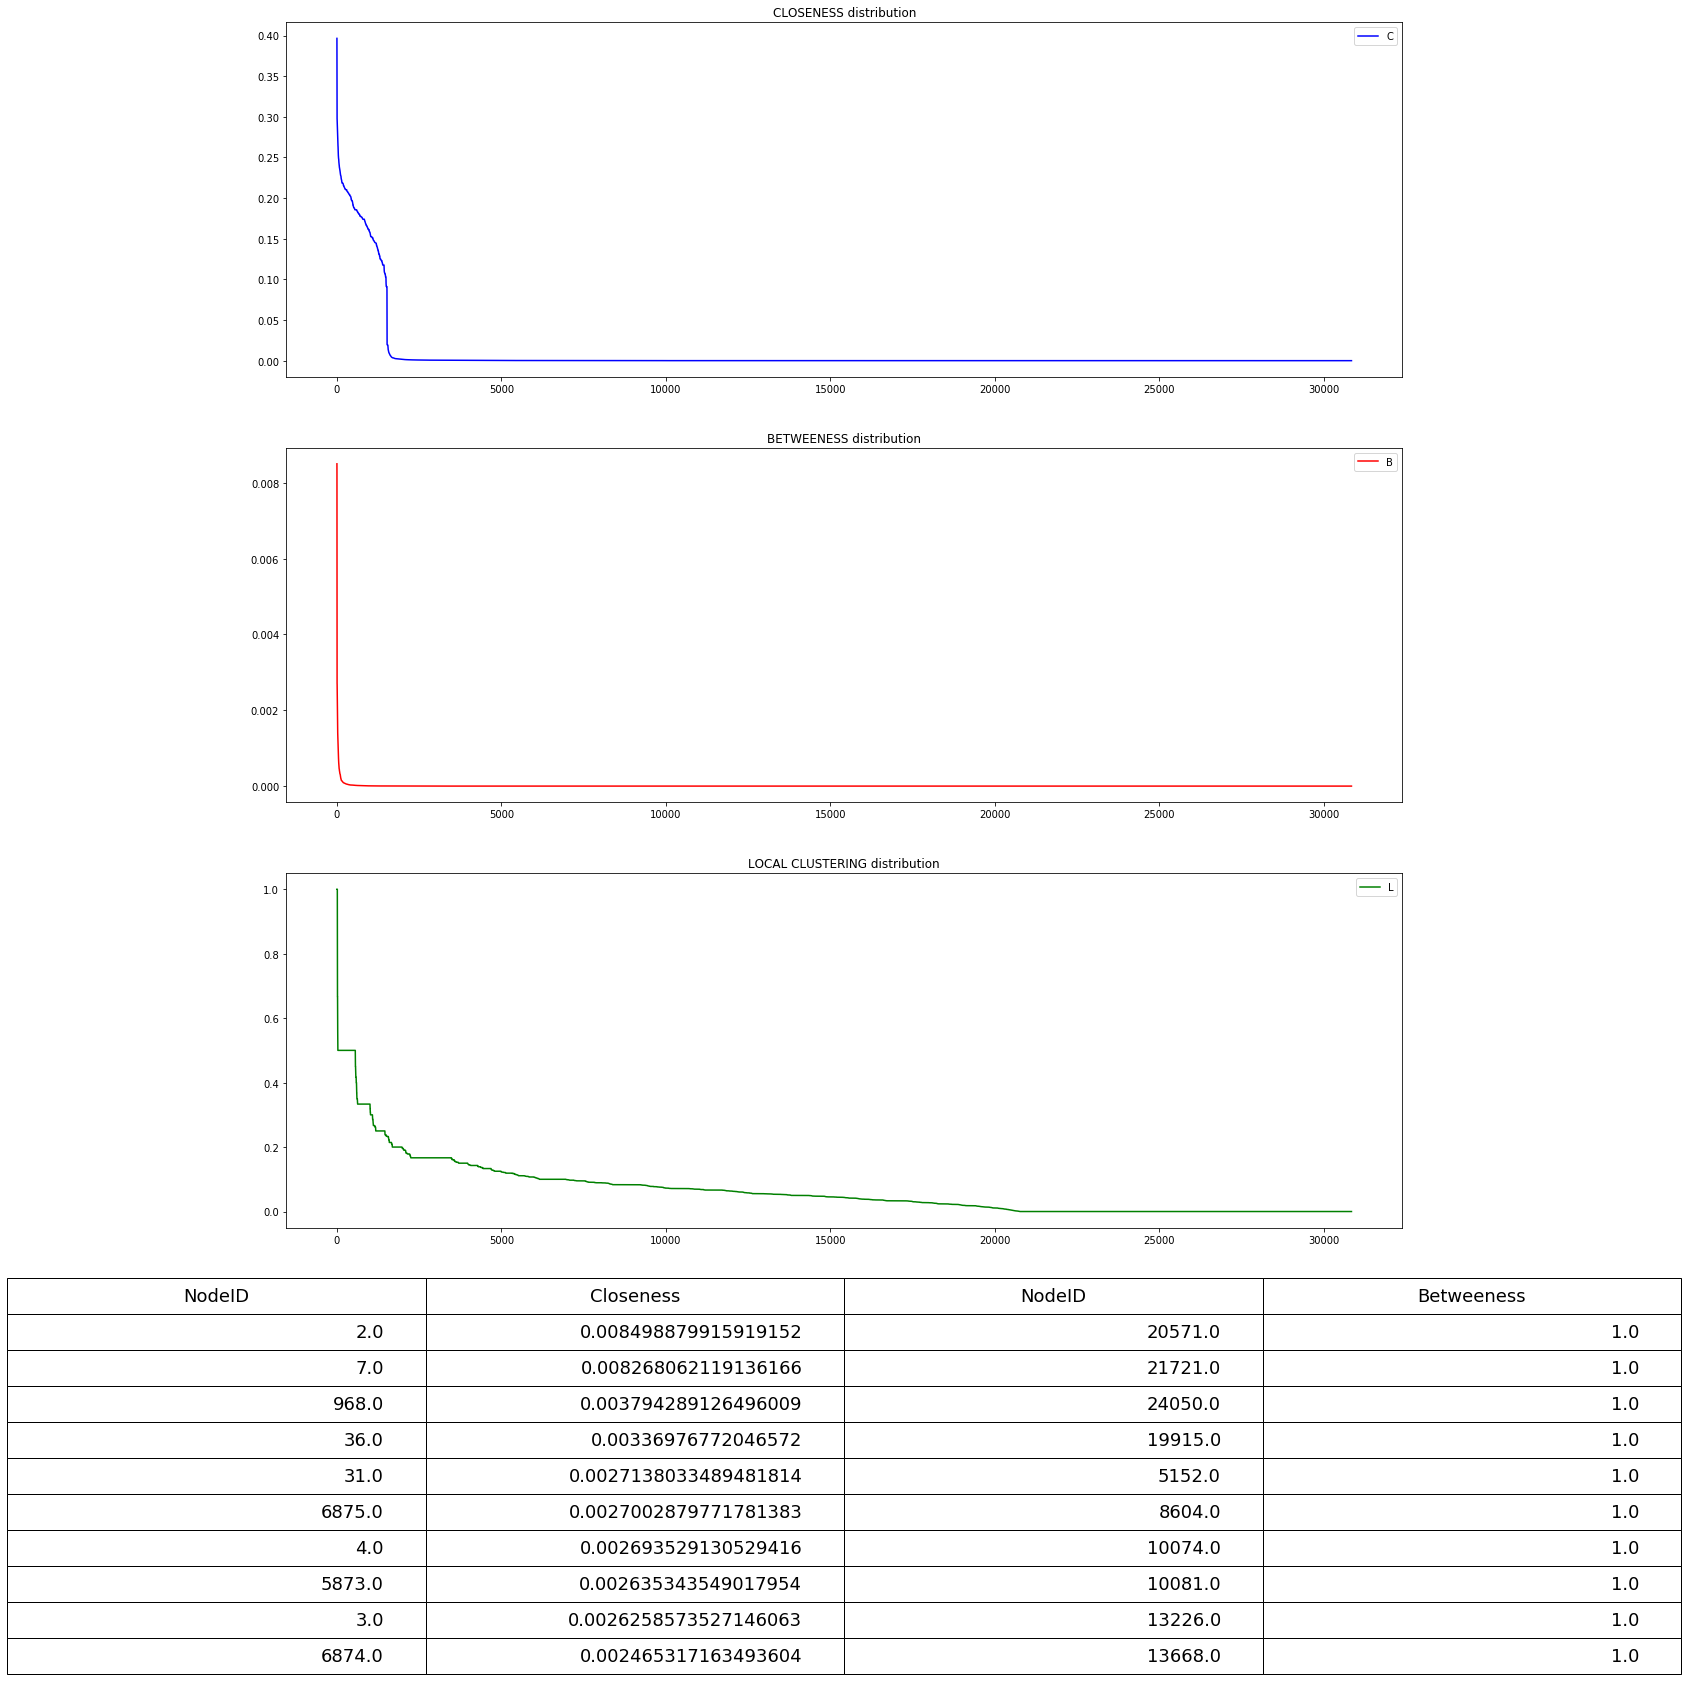

In [26]:
#Display Metrics

fig, axs =plt.subplots(4,1,figsize=(20,30))
label=("NodeID", "Closeness", "NodeID","Betweeness","NodeID","Local clustering")
axs[3].axis('tight')
axs[3].axis('off')

tab=axs[3].table(cellText=x[6:,:10].transpose(),colLabels=label,loc='center')
tab.set_fontsize(18)
tab.scale(1.5,3)  

axs[0].plot(x[5,:].transpose(),color="blue" );axs[0].legend(('C'));axs[0].set_title("CLOSENESS distribution")
axs[1].plot(x[7,:].transpose(),color="red" );axs[1].legend(('B'));axs[1].set_title("BETWEENESS distribution")
axs[2].plot(x[9,:].transpose(),color="green" );axs[2].legend(('LC'));axs[2].set_title("LOCAL CLUSTERING distribution")
plt.show()

<h2 style="color:#990000">III. SUMMARY </h2> 

- To summurize all the graph metrics : 

In [27]:
print ("Nodes                     ",N)
print ("Edges                     ",L)
print ("Average Degree            ",avg_degree_in)
print ("Density                   ",D)
print ("SCC                       ",SCC_n)
print ("WCC                       ",SCC_n)
print ("Giant SCC                 ",giant_SCC.number_of_nodes())
print ("Giant WCC                 ",giant_WCC.number_of_nodes())
print ("Diameter                  ",diameter)
print ("Average of shortest path  ",avg_giodesic)
print ("Average of Transitivity   ",GC)
print ("Average of Clustering     ",LC)
print ("Assortivity     ",degree_assortative_coef)

Nodes                      30837
Edges                      213954
Average Degree             6.938223562603366
Density                    0.00022500400708922577
SCC                        29830
WCC                        29830
Giant SCC                  913
Giant WCC                  30817
Diameter                   19
Average of shortest path   4.030498462079988
Average of Transitivity    0.056917071701333866
Average of Clustering      0.06679985232283962
Assortivity      -0.07729078923402623
